<a href="https://colab.research.google.com/github/LaloMontealvo/Weekly-Labs/blob/main/shark_attacks_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [219]:
!pip install xlrd

In [220]:
# @title
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [221]:
#Project: Shark Attacks Data Wrangling
#Step 1: Import Libraries and Load Dataset

import pandas as pd # Load the shark attack dataset into a pandas DataFrame

# Correct full path to uploaded Excel file
df = pd.read_excel("/content/drive/MyDrive/GSAF5.xls", engine="xlrd")

# Clean column names
df.columns = df.columns.str.strip()

# Display first rows
df.head()

df.info
#Step 2: Initial Data Exploration
print(df.head())
print(df.shape)
#Step 3: Cleaning and Formatting Columns
print(df.columns)
print(df.info())
print(df.nunique())
print(df.isnull().sum().sort_values(ascending=False))
print(df['Country'].value_counts().head(10))
print(df['Activity'].value_counts().head(10))
print(df['Fatal Y/N'].value_counts())
#Step 4: Handling Missing and Inconsistent Values

        Date    Year        Type       Country           State  \
0  6th July   2025.0    Provoked           USA   Massachusetts   
1   6th July  2025.0  Unprovoked           USA         Florida   
2   4th July  2025.0  Unprovoked  South Africa   KwaZulu-Natal   
3  29th June  2025.0  Unprovoked     Australia             NSW   
4  25th June  2025.0  Unprovoked           USA  Long Island NY   

                          Location  Activity                  Name Sex Age  \
0    Hoicks Hollow Nantucket Beach   Fishing          Unknown Male   M  21   
1                 New Smyrna Beach   Surfing          Unknown Male   M  40   
2             Mfazazana Hibberdene   Fishing          Unknown male   M  37   
3  Norries Headland Cabarita Beach  Swimming  Unknown teenage Male   M  16   
4                          Wantagh  Swimming        Unknown Female   F  20   

   ...                         Species  \
0  ...                         Unknown   
1  ...  Undetermined small shall shark   
2  ...  

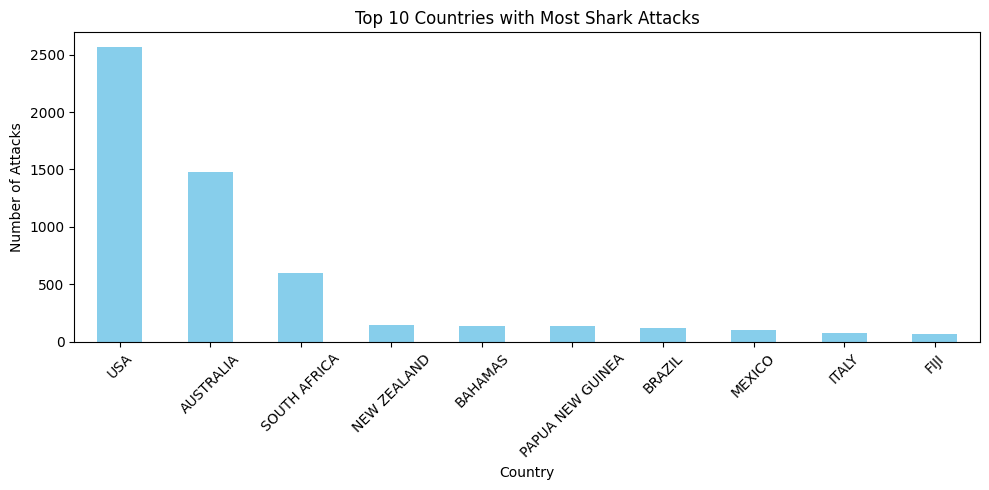

In [222]:
import matplotlib.pyplot as plt
#Step 6: Exploratory Data Analysis (EDA)
# Count shark attacks per country and show top 10
top_countries = df['Country'].value_counts().head(10)
# Plotting (showing threads on time)
plt.figure(figsize=(10, 5))
top_countries.plot(kind='bar', color='skyblue')
plt.title('Top 10 Countries with Most Shark Attacks')
plt.xlabel('Country')
plt.ylabel('Number of Attacks')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

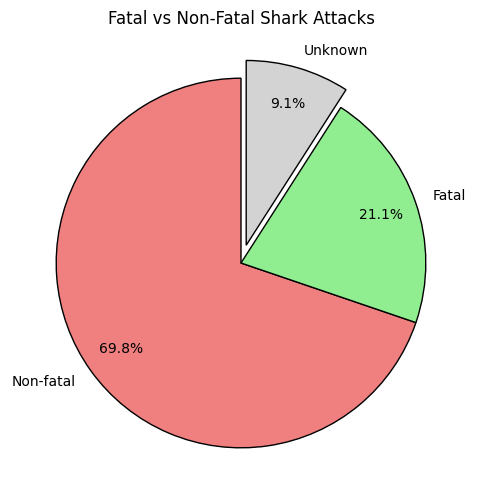

In [223]:
#Step 7: Visualizations
# Define a function to map existing values to your 3 categories
def map_fatal_status(x):
    if pd.isna(x) or str(x).strip().upper() in ['UNKNOWN', '', 'UNKN', 'UNK', 'NA', 'NAN']:
        return 'Unknown'
    elif str(x).strip().upper() in ['Y', 'YES', 'FATAL', 'F']:
        return 'Fatal'
    elif str(x).strip().upper() in ['N', 'NO', 'NON-FATAL', 'NON FATAL', 'NF', 'SURVIVED']:
        return 'Non-fatal'
    else:
        # For any other unexpected value, consider as Unknown
        return 'Unknown'

# Apply mapping
df['Fatal_Category'] = df['Fatal Y/N'].apply(map_fatal_status)

# Count occurrences for the 3 categories
fatal_counts_grouped = df['Fatal_Category'].value_counts()

# Define colors for these 3 categories
colors = ['lightcoral', 'lightgreen', 'lightgrey']

# Explode smallest slice a bit for visibility
explode = [0.1 if count == fatal_counts_grouped.min() else 0 for count in fatal_counts_grouped]

# Plot
plt.figure(figsize=(6, 6))
fatal_counts_grouped.plot(
    kind='pie',
    labels=fatal_counts_grouped.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=colors,
    explode=explode,
    labeldistance=1.1,
    pctdistance=0.8,
    wedgeprops={'edgecolor': 'black'}
)
plt.title('Fatal vs Non-Fatal Shark Attacks')
plt.ylabel('')
plt.show()


In [224]:
print(df.columns.tolist())


['Date', 'Year', 'Type', 'Country', 'State', 'Location', 'Activity', 'Name', 'Sex', 'Age', 'Injury', 'Fatal Y/N', 'Time', 'Species', 'Source', 'pdf', 'href formula', 'href', 'Case Number', 'Case Number.1', 'original order', 'Unnamed: 21', 'Unnamed: 22', 'Fatal_Category']


In [225]:
# Standardize all column names
df.columns = (
    df.columns
    .str.strip()                    # remove leading/trailing whitespace
    .str.lower()                    # lowercase all names
    .str.replace(" ", "_")          # replace spaces with underscores
    .str.replace("^st$", "state")   # replace 'st' with 'state' ONLY if entire name is 'st'
)
print(df.columns)

Index(['date', 'year', 'type', 'country', 'state', 'location', 'activity',
       'name', 'sex', 'age', 'injury', 'fatal_y/n', 'time', 'species',
       'source', 'pdf', 'href_formula', 'href', 'case_number', 'case_number.1',
       'original_order', 'unnamed:_21', 'unnamed:_22', 'fatal_category'],
      dtype='object')


In [226]:
#Unwanted columns: case number 1, original order, unnamed:_21, unnamed_22, pdf, href_formula, href
cols_to_drop = ['case_number.1', 'original_order', 'unnamed:_21', 'unnamed:_22', 'pdf', 'href_formula', 'href']
df.drop(columns=cols_to_drop, inplace=True, errors='ignore')
print(df.columns)

Index(['date', 'year', 'type', 'country', 'state', 'location', 'activity',
       'name', 'sex', 'age', 'injury', 'fatal_y/n', 'time', 'species',
       'source', 'case_number', 'fatal_category'],
      dtype='object')


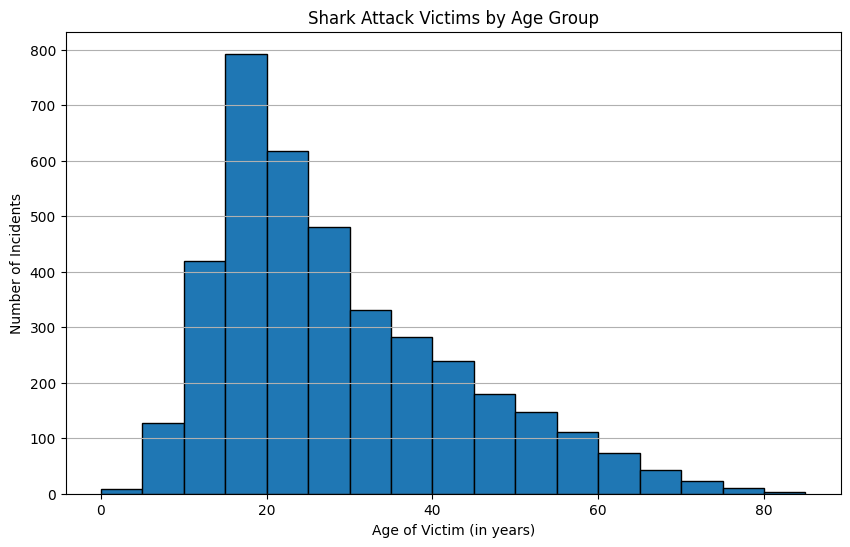

In [227]:
df['decade'] = (df['year'] // 10) * 10 # New column 'decade' by grouping the 'year' into decades analizing threads over time

df['age'] = pd.to_numeric(df['age'], errors='coerce') # Convert 'age' column to numeric and drop invalid values
# Plot a histogram to show how many shark attack victims belonged to each age group
# This helps identify which ages are most at risk (e.g., 20–30 years old)
plt.figure(figsize=(10, 6))
plt.hist(df['age'].dropna(), bins=range(0, 90, 5), edgecolor='black')
plt.title('Shark Attack Victims by Age Group')
plt.xlabel('Age of Victim (in years)')
plt.ylabel('Number of Incidents')
plt.grid(axis='y')
plt.show()
df['decade'] = (df['year'] // 10) * 10

fatal_category,Fatal,Non-fatal,Unknown
activity,,,
Swimming,325.0,576.0,99.0
Bathing,71.0,77.0,16.0
Surfing,65.0,1023.0,47.0
Spearfishing,54.0,305.0,29.0
Fishing,51.0,416.0,25.0
Fell overboard,26.0,3.0,3.0
Diving,24.0,103.0,20.0
Swimming,21.0,20.0,6.0
Snorkeling,19.0,107.0,6.0


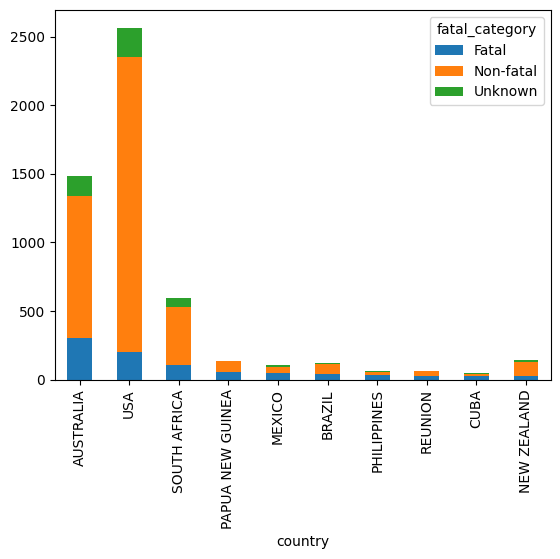

In [228]:
df.groupby(['country', 'fatal_category']).size().unstack().fillna(0).sort_values('Fatal', ascending=False).head(10).plot(kind='bar', stacked=True)
df.groupby(['activity', 'fatal_category']).size().unstack().fillna(0).sort_values('Fatal', ascending=False).head(10)


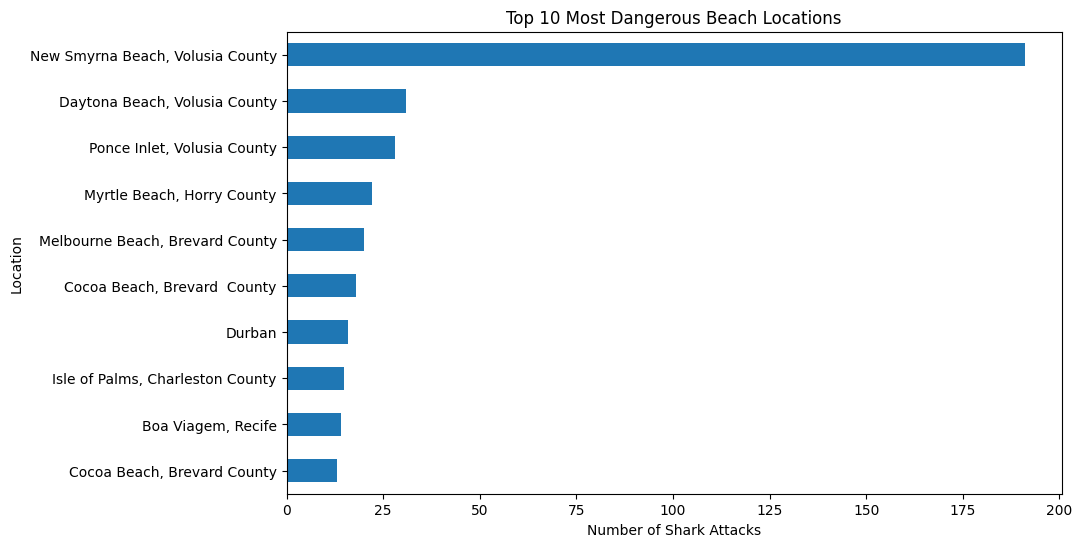

In [229]:
df['location'].value_counts().head(10).plot(kind='barh', figsize=(10, 6))
plt.title('Top 10 Most Dangerous Beach Locations')
plt.xlabel('Number of Shark Attacks')
plt.ylabel('Location')
plt.gca().invert_yaxis()
plt.show()

/tmp/ipython-input-230-3213590596.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['date'] = pd.to_datetime(df['date'], errors='coerce')


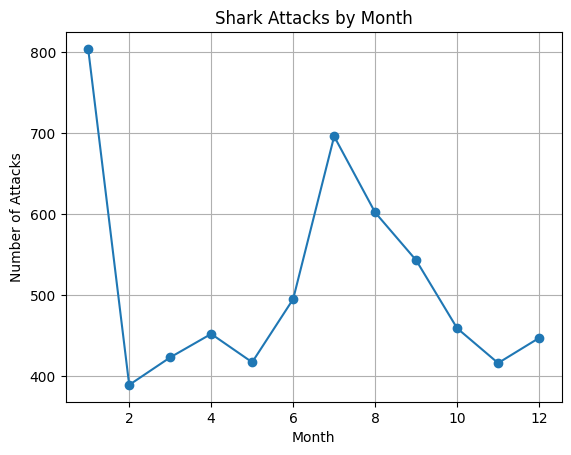

In [230]:
df['date'] = pd.to_datetime(df['date'], errors='coerce')
df['month'] = df['date'].dt.month

df['month'].value_counts().sort_index().plot(kind='line', marker='o')
plt.title('Shark Attacks by Month')
plt.xlabel('Month')
plt.ylabel('Number of Attacks')
plt.grid(True)
plt.show()

Travelers, water sports participants, and tour providers lack easy access to real-time and location-specific ocean safety data. This gap poses a potential risk to public safety and limits proactive risk management for coastal tourism and recreation services.

### 🧪 Hypothesis  
Historical shark attack data reveals location- and time-based patterns that can be used to develop a real-time safety score system, improving ocean safety awareness for travelers and water activity businesses.

### 💼 Business Proposal  
We propose a Smart Safety API that:  
- Integrates with platforms like Booking.com, Google Maps, or AirBnB  
- Displays real-time "Safe to Swim" indicators for beaches and coastal destinations  
- Provides location-based data like shark attack history, seasonal risk trends, and alert scores  
- Connects with services like surfing schools, diving tours, or wearable tech  

### ✅ Why It Makes Sense  
Our analysis confirms:  
- Certain **countries and locations** have significantly higher attack rates  
- Activities like **surfing and swimming** are more commonly involved  
- Some **timeframes or months** show increased attack frequency  

This proves that risk is predictable and supports the API idea as an MVP (minimum viable product) to inform travelers and protect lives.

## 📊 Dashboard: Key Insights from the Data

In [231]:
print(df.columns)

Index(['date', 'year', 'type', 'country', 'state', 'location', 'activity',
       'name', 'sex', 'age', 'injury', 'fatal_y/n', 'time', 'species',
       'source', 'case_number', 'fatal_category', 'decade', 'month'],
      dtype='object')


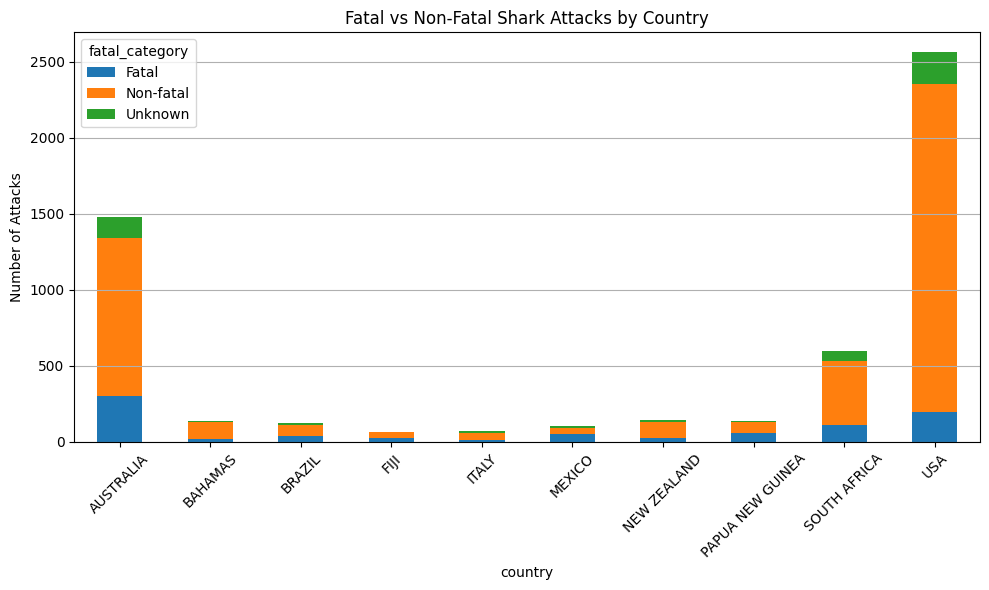

In [232]:
# Group and count Fatal vs Non-Fatal attacks for top 10 countries
top_countries = df['country'].value_counts().head(10).index
country_fatality = df[df['country'].isin(top_countries)].groupby(['country', 'fatal_category']).size().unstack().fillna(0)

# Plot
country_fatality.plot(kind='bar', stacked=True, figsize=(10,6))
plt.title('Fatal vs Non-Fatal Shark Attacks by Country')
plt.xlabel('country')
plt.ylabel('Number of Attacks')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(axis='y')
plt.show()

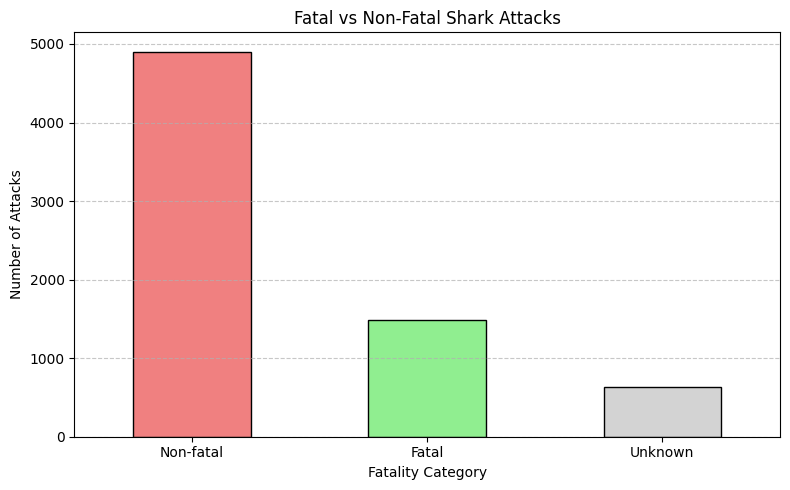

In [233]:
# @title
def map_fatal_status(x):
    if pd.isna(x) or str(x).strip().upper() in ['UNKNOWN', '', 'UNKN', 'UNK', 'NA', 'NAN']:
        return 'Unknown'
    elif str(x).strip().upper() in ['Y', 'YES', 'FATAL', 'F']:
        return 'Fatal'
    elif str(x).strip().upper() in ['N', 'NO', 'NON-FATAL', 'NON FATAL', 'NF', 'SURVIVED']:
        return 'Non-fatal'
    else:
        return 'Unknown'

# Apply mapping to the correct column name
df['Fatal_Category'] = df['fatal_y/n'].apply(map_fatal_status)

# Bar chart of Fatal vs Non-Fatal vs Unknown
fatal_counts_grouped = df['Fatal_Category'].value_counts()

# Set colors
colors = ['lightcoral', 'lightgreen', 'lightgrey']

# Plot bar chart
plt.figure(figsize=(8, 5))
fatal_counts_grouped.plot(
    kind='bar',
    color=colors,
    edgecolor='black'
)
plt.title('Fatal vs Non-Fatal Shark Attacks')
plt.xlabel('Fatality Category')
plt.ylabel('Number of Attacks')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

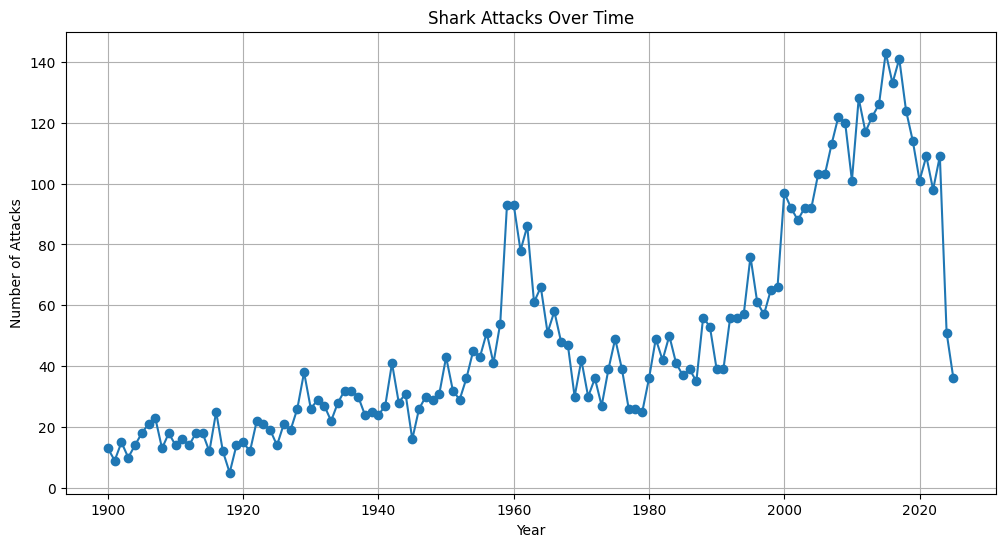

In [234]:
# Line chart: Number of attacks per year
valid_years = df[(df['year'] >= 1900) & (df['year'] <= 2025)]
attacks_per_year = valid_years.groupby('year').size()

plt.figure(figsize=(12, 6))
attacks_per_year.plot(kind='line', marker='o')
plt.title('Shark Attacks Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Attacks')
plt.grid(True)
plt.show()

📍 **Summary: Shark Attacks by Country**

- The top country with the most attacks is the United States.
- Other frequent locations include Australia, South Africa, and Brazil.
- These countries also show high numbers of **non-fatal attacks**, possibly due to better emergency response systems.